In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt
sns.set(color_codes=True)
import os, datetime
from collections import Counter
from matplotlib.offsetbox import AnchoredText

# Se importa el csv y filtra solo positivos

In [2]:
os.getcwd() #ahi se guarda el csv

'/home/nacho/Documents/coronavirus/COVID-19_Paper/notebooks'

In [3]:
df = pd.read_csv("../covid_data.csv.zip")
print("Dimensiones del df: ", df.shape)

Dimensiones del df:  (1127114, 32)


In [4]:
#SOLO CASOS POSITIVOS COVID
df = df[df.RESULTADO == 1]
df.drop(['RESULTADO'], axis=1, inplace = True)
print("Dimensiones del df: ", df.shape)
#lista de columnas
list(df)

Dimensiones del df:  (498380, 31)


['SECTOR',
 'ENTIDAD_UM',
 'SEXO',
 'ENTIDAD_NAC',
 'ENTIDAD_RES',
 'MUNICIPIO_RES',
 'TIPO_PACIENTE',
 'FECHA_INGRESO',
 'FECHA_SINTOMAS',
 'FECHA_DEF',
 'INTUBADO',
 'NEUMONIA',
 'EDAD',
 'NACIONALIDAD',
 'EMBARAZO',
 'HABLA_LENGUA_INDIG',
 'DIABETES',
 'EPOC',
 'ASMA',
 'INMUSUPR',
 'HIPERTENSION',
 'OTRA_COM',
 'CARDIOVASCULAR',
 'OBESIDAD',
 'RENAL_CRONICA',
 'TABAQUISMO',
 'OTRO_CASO',
 'UCI',
 'DIAS_DIF_HOSP',
 'BOOL_DEF',
 'DIAS_DIF_DEF']

In [5]:
print("Numero de casos positivos de COVID: ", len(df))
print("Numero de hospitalizados por COVID: ", df.TIPO_PACIENTE.value_counts()[1])
print("Numero de intubados por COVID: ", df.INTUBADO.value_counts()[1])
print("Numero de fallecidos por COVID: ", df.BOOL_DEF.value_counts()[1])
print("Numero de UCI por COVID: ", df.UCI.value_counts()[1])

Numero de casos positivos de COVID:  498380
Numero de hospitalizados por COVID:  131998
Numero de intubados por COVID:  12742
Numero de fallecidos por COVID:  54666
Numero de UCI por COVID:  10528


# Gráficas

In [6]:
#funcion para agregar las fechas
def plot_date(ax):
    txtbox = ax.text(0.0, 0.975, datetime.datetime.now().strftime('%b %d, %Y'), transform=ax.transAxes, fontsize=7,
        verticalalignment='center', bbox=dict(boxstyle='round', facecolor='w',alpha=0.5)) 
    txtbox.set_x(1.0-(txtbox.figure.bbox.bounds[2]-(txtbox.clipbox.bounds[2]-txtbox.clipbox.bounds[0]))/txtbox.figure.bbox.bounds[2])


Entidades de residencia con caso de covid:
 9     82510
15    59174
11    25244
27    24954
30    24687
21    23311
19    22577
26    19531
28    18929
5     16576
14    15852
2     14881
25    14174
24    13153
12    12756
31    12001
20    11975
16    11684
23     8952
13     8148
8      6277
7      5990
3      5799
29     5311
4      5062
10     4970
1      4624
22     4548
17     4488
18     4094
32     3673
6      2475
Name: ENTIDAD_RES, dtype: int64


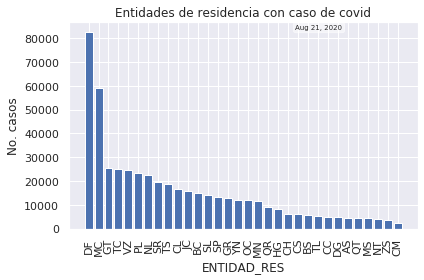

In [7]:
def grafica1(df):
    df_estados = pd.read_csv("../diccionario_datos_covid19/diccionario_estados.csv",index_col=False)
    df_estados = df_estados.iloc[:,[0,2]]
    dict_estados = df_estados.set_index('CLAVE_ENTIDAD').T.to_dict('list')
    def get_value(val, my_dict):
        for key,value in my_dict.items():
            if val == key:
                return value
    fig, ax = plt.subplots() 
    height = df['ENTIDAD_RES'].value_counts().sort_values(ascending=False).values
    bars = np.asarray(df['ENTIDAD_RES'].value_counts().sort_values(ascending=False).index)
    string_bars = [get_value(bars[i],dict_estados) for i in range(len(bars))]
    string_bars = [i[0] for i in string_bars]
    y_pos = np.arange(len(bars))
    ax.bar(y_pos, height) 
    ax.set_title('Entidades de residencia con caso de covid') 
    plt.xticks(y_pos, string_bars,rotation='vertical')
    ax.set_xlabel('ENTIDAD_RES') 
    ax.set_ylabel('No. casos')
    plot_date(ax)
    fig.tight_layout()
print("Entidades de residencia con caso de covid:\n", df['ENTIDAD_RES'].value_counts())
grafica1(df)

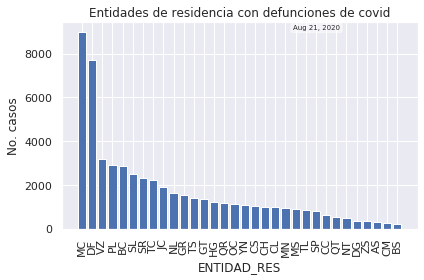

In [8]:
def grafica2(df):
    df = df[df.BOOL_DEF == 1]
    df_estados = pd.read_csv("../diccionario_datos_covid19/diccionario_estados.csv",index_col=False)
    df_estados = df_estados.iloc[:,[0,2]]
    dict_estados = df_estados.set_index('CLAVE_ENTIDAD').T.to_dict('list')
    def get_value(val, my_dict):
        for key,value in my_dict.items():
            if val == key:
                return value
    fig, ax = plt.subplots() 
    height = df['ENTIDAD_RES'].value_counts().sort_values(ascending=False).values
    bars = np.asarray(df['ENTIDAD_RES'].value_counts().sort_values(ascending=False).index)
    string_bars = [get_value(bars[i],dict_estados) for i in range(len(bars))]
    string_bars = [i[0] for i in string_bars]
    y_pos = np.arange(len(bars))
    ax.bar(y_pos, height) 
    ax.set_title('Entidades de residencia con defunciones de covid') 
    plt.xticks(y_pos, string_bars,rotation='vertical')
    ax.set_xlabel('ENTIDAD_RES') 
    ax.set_ylabel('No. casos')
    plot_date(ax)
    fig.tight_layout()
grafica2(df)

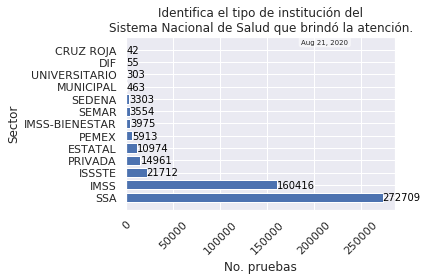

In [9]:
def sector_barchart(df):
    df_sector = pd.read_csv("../diccionario_datos_covid19/diccionario_sector.csv",index_col=False)
    dict_sector = df_sector.set_index('CLAVE').T.to_dict('list')
    def get_value(val, my_dict):
         for key,value in my_dict.items():
             if val == key:
                 return value
    fig, ax = plt.subplots() 
    height = df['SECTOR'].value_counts().sort_values(ascending=False).values
    bars = np.asarray(df['SECTOR'].value_counts().sort_values(ascending=False).index)
    string_bars = [get_value(bars[i],dict_sector) for i in range(len(bars))]
    string_bars = [i[0] for i in string_bars]
    y_pos = np.arange(len(bars))
    width = 0.75
    ax.barh(y_pos, height,width)     
    ax.set_title('Identifica el tipo de institución del\nSistema Nacional de Salud que brindó la atención.') 
    plt.xticks(rotation=45)
    #plt.xticks(y_pos, string_bars)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(string_bars, minor=False)
    ax.set_xlabel('No. pruebas') 
    ax.set_ylabel('Sector')
    plot_date(ax)
    for i, v in enumerate(height):
        ax.text(v + 3, i-.25 , str(v), color='black')
    fig.tight_layout()
sector_barchart(df)

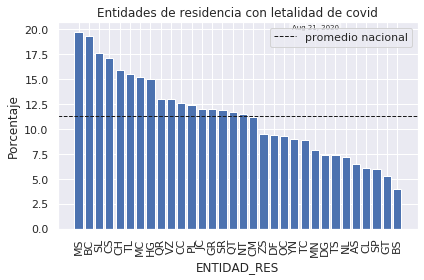

In [10]:
def estados_let(df):
    df_def = df[df.BOOL_DEF == 1]
    df_estados = pd.read_csv("../diccionario_datos_covid19/diccionario_estados.csv",index_col=False)
    df_estados = df_estados.iloc[:,[0,2]]
    dict_estados = df_estados.set_index('CLAVE_ENTIDAD').T.to_dict('list')
    def get_value(val, my_dict):
        for key,value in my_dict.items():
            if val == key:
                return value
    fig, ax = plt.subplots() 
    height = df['ENTIDAD_RES'].value_counts().rename_axis('unique_values').to_frame('counts')
    height_def = df_def['ENTIDAD_RES'].value_counts().rename_axis('unique_values').to_frame('counts')
    height.sort_index(inplace=True)
    height_def.sort_index(inplace=True)
    let_percentage =  height_def/height*100
    let_percentage = let_percentage.sort_values('counts', ascending=False)
    bars = np.asarray(let_percentage.index)
    let_percentage= let_percentage.values
    let_percentage = np.array(let_percentage).ravel()
    string_bars = [get_value(bars[i],dict_estados) for i in range(len(bars))]
    string_bars = [i[0] for i in string_bars]
    y_pos = np.arange(len(bars))
    ax.bar(y_pos, let_percentage)
    def_mean = let_percentage.mean()
    plt.axhline(y=def_mean,linewidth=1, color='k',linestyle='--',label='promedio nacional')
    ax.set_title('Entidades de residencia con letalidad de covid') 
    plt.xticks(y_pos, string_bars,rotation='vertical')
    ax.set_xlabel('ENTIDAD_RES') 
    ax.set_ylabel('Porcentaje')
    plot_date(ax)
    l = plt.legend(loc ='upper right') 
    fig.tight_layout()
estados_let(df)

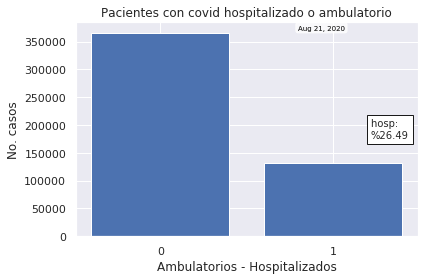

In [11]:
def grafica3(df):
    fig, ax = plt.subplots() 
    plot_date(ax)
    ax.bar((df['TIPO_PACIENTE'].value_counts()).index, (df['TIPO_PACIENTE'].value_counts()).values) 
    ax.set_title('Pacientes con covid hospitalizado o ambulatorio') 
    ax.set_xlabel('Ambulatorios - Hospitalizados') 
    ax.set_ylabel('No. casos')
    ax.set_xticks((df['TIPO_PACIENTE'].value_counts()).index)
    texto="hosp: \n%"+str(round(df['TIPO_PACIENTE'].value_counts().values[1]/len(df['TIPO_PACIENTE'])*100,2))
    anchored_text = AnchoredText(texto, loc="center right")
    ax.add_artist(anchored_text)
    plot_date(ax)
    fig.tight_layout()
grafica3(df)

Pacientes Hospitalizados Intubados:
 0    119256
1     12742
Name: INTUBADO, dtype: int64
Porcentaje de pacientes hospitalizados e intubados:  2.62376502662477


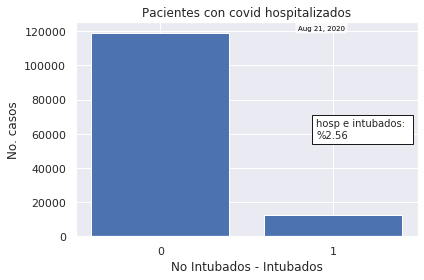

In [12]:
def grafica4(df):
    df['TIPO_PACIENTE'].value_counts()
    df_aux = df.loc[df.TIPO_PACIENTE == 1]
    df_aux.drop(['TIPO_PACIENTE'], axis=1, inplace = True)
    print("Pacientes Hospitalizados Intubados:\n", df_aux['INTUBADO'].value_counts())
    print("Porcentaje de pacientes hospitalizados e intubados: ",((df['INTUBADO'].value_counts()).values[1]/(df['INTUBADO'].value_counts()).values[0])*100)
    fig, ax = plt.subplots() 
    plot_date(ax)
    ax.bar((df_aux['INTUBADO'].value_counts()).index, (df_aux['INTUBADO'].value_counts()).values) 
    ax.set_title('Pacientes con covid hospitalizados') 
    ax.set_xlabel('No Intubados - Intubados') 
    ax.set_ylabel('No. casos')
    ax.set_xticks((df_aux['INTUBADO'].value_counts()).index)
    texto="hosp e intubados: \n%"+str(round(df['INTUBADO'].value_counts().values[1]/len(df['INTUBADO'])*100,2))
    anchored_text = AnchoredText(texto, loc="center right")
    ax.add_artist(anchored_text)
    plot_date(ax)
    fig.tight_layout()
grafica4(df)

Casos con covid fallecidos:
 0    443714
1     54666
Name: BOOL_DEF, dtype: int64
Porcentaje de mortalidad:  10.968738713431518


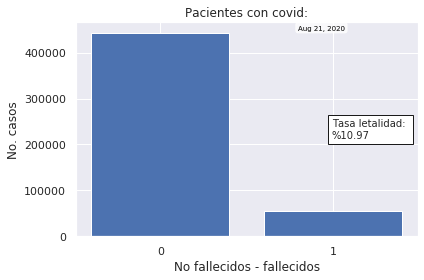

In [13]:
def grafica5(df):
    print("Casos con covid fallecidos:\n", df['BOOL_DEF'].value_counts())
    print("Porcentaje de mortalidad: ",((df['BOOL_DEF'].value_counts()).values[1]/len(df['BOOL_DEF'])*100))
    fig, ax = plt.subplots() 
    plot_date(ax)
    ax.bar((df['BOOL_DEF'].value_counts()).index, (df['BOOL_DEF'].value_counts()).values) 
    ax.set_title('Pacientes con covid:') 
    ax.set_xlabel('No fallecidos - fallecidos') 
    ax.set_ylabel('No. casos')
    ax.set_xticks((df['BOOL_DEF'].value_counts()).index)
    texto="Tasa letalidad: \n%"+str(round(df['BOOL_DEF'].value_counts().values[1]/len(df['BOOL_DEF'])*100,2))
    anchored_text = AnchoredText(texto, loc="center right")
    ax.add_artist(anchored_text)
    plot_date(ax)
    fig.tight_layout()
grafica5(df)


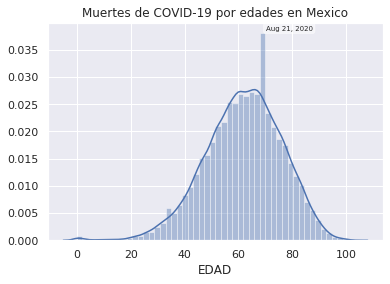

In [14]:
def grafica6():
    fig, ax = plt.subplots()
    plot_date(ax)
    df_solodef = df.loc[df.BOOL_DEF == 1]
    sns.distplot(df_solodef['EDAD']).set_title("Muertes de COVID-19 por edades en Mexico")  
    #plt.close(fig)
grafica6()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


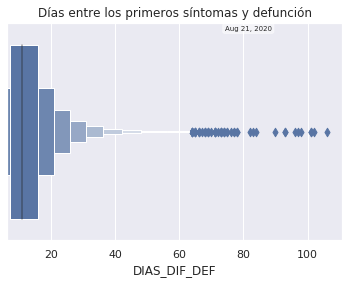

In [15]:
def grafica7():
    fig, ax = plt.subplots()
    plot_date(ax)
    df_solodef = df.loc[df.BOOL_DEF == 1]
    sns.boxenplot(df_solodef['DIAS_DIF_DEF']).set_title("Días entre los primeros síntomas y defunción")      
    #plt.close(fig)
grafica7()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


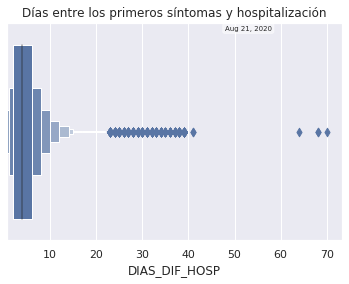

In [16]:
def grafica8():
    fig, ax = plt.subplots()
    plot_date(ax)
    sns.boxenplot(df['DIAS_DIF_HOSP']).set_title("Días entre los primeros síntomas y hospitalización")      
    #plt.close(fig)
grafica8()

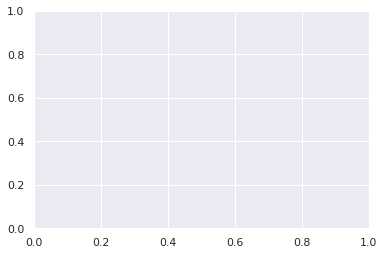

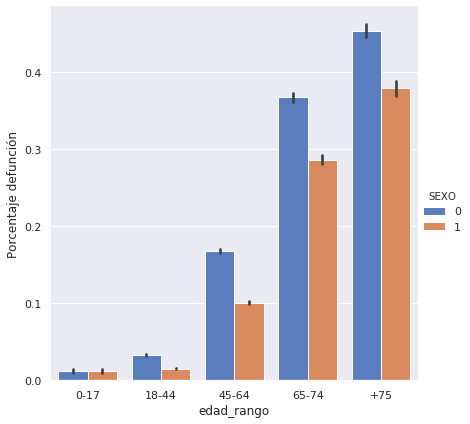

In [17]:
def grafica9():
    df['edad_rango'] = pd.cut(x=df['EDAD'], bins=[0,17,44,64,74,max(df['EDAD'])], labels=['0-17','18-44','45-64','65-74','+75'])
    fig, ax = plt.subplots()
    g = sns.catplot(x="edad_rango", y="BOOL_DEF", hue="SEXO", data=df,
                height=6, kind="bar", palette="muted", legend=True)
    g.despine(left=True)
    g.set_ylabels("Porcentaje defunción")
grafica9()

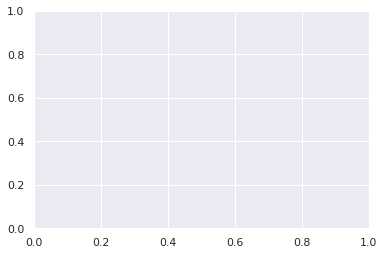

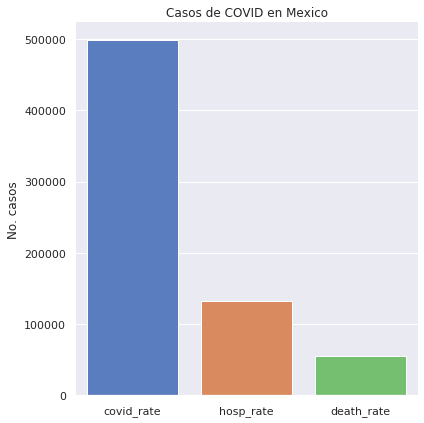

In [18]:
def grafica99():
    x= ['covid_rate', 'hosp_rate', 'death_rate']
    y = [len(df), len((df[df.TIPO_PACIENTE == 1])), len((df[df.BOOL_DEF == 1]))]
    fig, ax = plt.subplots()
    g = sns.catplot(x=x, y=y, data=df, height=6, kind="bar", palette="muted")
    g.despine(left=True)
    g.set_ylabels("No. casos")
    plt.title("Casos de COVID en Mexico")
    plt.xlabel(None)
grafica99()

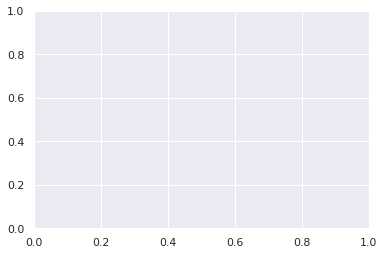

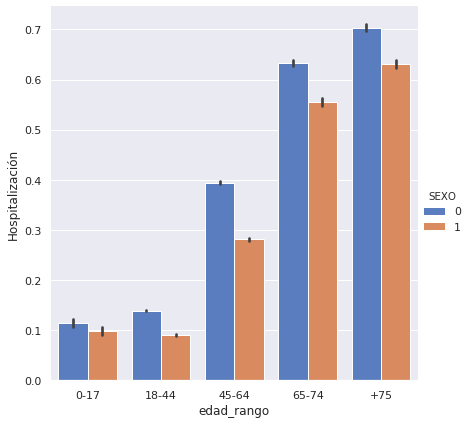

In [19]:
def grafica10():
    df['edad_rango'] = pd.cut(x=df['EDAD'], bins=[0,17,44,64,74,max(df['EDAD'])], labels=['0-17','18-44','45-64','65-74','+75'])
    fig, ax = plt.subplots()
    g = sns.catplot(x="edad_rango", y="TIPO_PACIENTE", hue="SEXO", data=df,
                height=6, kind="bar", palette="muted")
    g.despine(left=True)
    g.set_ylabels("Hospitalización")
grafica10()

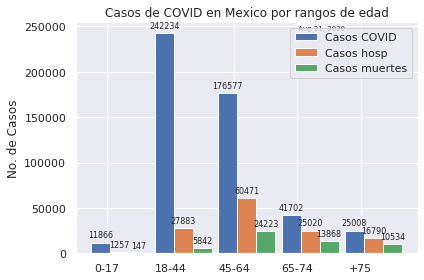

In [20]:
def grafica11():
    df['edad_rango'] = pd.cut(x=df['EDAD'], bins=[0,17,44,64,74,max(df['EDAD'])], labels=['0-17','18-44','45-64','65-74','+75'])
    labels = df['edad_rango'].cat.categories.tolist()
    covid_rate, hosp_rate, death_rate = [],[], []
    for i in range(len(labels)):
        covid_rate.append(len(df[df.edad_rango == df['edad_rango'].cat.categories.tolist()[i]]))
        hosp_rate.append(len(df[(df.edad_rango == df['edad_rango'].cat.categories.tolist()[i]) & (df.TIPO_PACIENTE == 1)]))
        death_rate.append(len(df[(df.edad_rango == df['edad_rango'].cat.categories.tolist()[i]) & (df.BOOL_DEF == 1)]))
    x = np.arange(len(labels)) #pocisiones de labels
    width = 0.30 #ancho de las barras
    fig, ax = plt.subplots()
    bar1 = ax.bar(x - width/3, covid_rate, width, label="Casos COVID")
    bar2 = ax.bar(x + 2*(width/3), hosp_rate, width, label="Casos hosp")
    bar3 = ax.bar(x + 5*(width/3), death_rate, width, label="Casos muertes")
    ax.set_ylabel("No. de Casos")
    ax.set_title("Casos de COVID en Mexico por rangos de edad")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    
    def autolabel(rects):
    #Attach a text label above each bar in *rects*, displaying its height.
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=8)
    autolabel(bar1); autolabel(bar2); autolabel(bar3)
    #plt.show()
    plot_date(ax)
    fig.tight_layout()
grafica11()

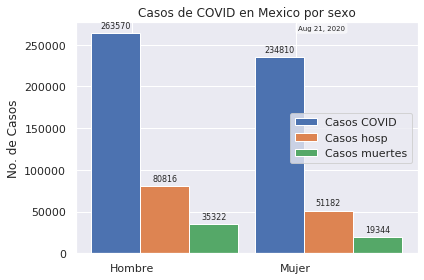

In [21]:
def grafica12():
    labels = ['Hombre', 'Mujer']
    covid_rate, hosp_rate, death_rate = [],[], []
    for i in range(len(labels)):
        covid_rate.append(len(df[df.SEXO == i]))
        hosp_rate.append(len(df[(df.SEXO == i) & (df.TIPO_PACIENTE == 1)]))
        death_rate.append(len(df[(df.SEXO == i) & (df.BOOL_DEF == 1)]))
    x = np.arange(len(labels)) #pocisiones de labels
    width = 0.30 #ancho de las barras
    fig, ax = plt.subplots()
    bar1 = ax.bar(x - width/3, covid_rate, width, label="Casos COVID")
    bar2 = ax.bar(x + 2*(width/3), hosp_rate, width, label="Casos hosp")
    bar3 = ax.bar(x + 5*(width/3), death_rate, width, label="Casos muertes")
    ax.set_ylabel("No. de Casos")
    ax.set_title("Casos de COVID en Mexico por sexo")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend(loc="center right")
    
    def autolabel(rects):
    #Attach a text label above each bar in *rects*, displaying its height.
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=8)
    autolabel(bar1); autolabel(bar2); autolabel(bar3)
    #plt.show()
    plot_date(ax)
    fig.tight_layout()
grafica12()

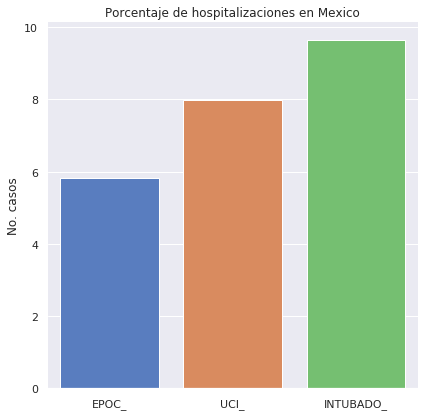

In [22]:
def grafica13():
    x= ['EPOC_', 'UCI_', 'INTUBADO_']
    hosp = len(df[df.TIPO_PACIENTE == 1])
    y = [len(df[df.EPOC == 1])*100/hosp,
len(df[df.UCI == 1])*100/hosp,
len(df[df.INTUBADO == 1])*100/hosp]
    #fig, ax = plt.subplots()
    g = sns.catplot(x=x, y=y, data=df, height=6, kind="bar", palette="muted")
    g.despine(left=True)
    g.set_ylabels("No. casos")
    plt.title("Porcentaje de hospitalizaciones en Mexico")
    plt.xlabel(None)
grafica13()

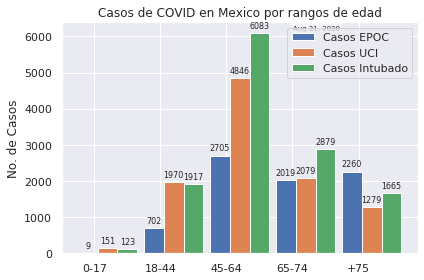

In [23]:
def grafica14():
    df['edad_rango'] = pd.cut(x=df['EDAD'], bins=[0,17,44,64,74,max(df['EDAD'])], labels=['0-17','18-44','45-64','65-74','+75'])
    labels = df['edad_rango'].cat.categories.tolist()
    EPOC_rate, UCI_rate, INTUBADO_rate = [],[], []
    for i in range(len(labels)):
        EPOC_rate.append(len(df[(df.edad_rango == df['edad_rango'].cat.categories.tolist()[i]) & (df.EPOC == 1)]))
        UCI_rate.append(len(df[(df.edad_rango == df['edad_rango'].cat.categories.tolist()[i]) & (df.UCI == 1)]))
        INTUBADO_rate.append(len(df[(df.edad_rango == df['edad_rango'].cat.categories.tolist()[i]) & (df.INTUBADO == 1)]))
    x = np.arange(len(labels)) #pocisiones de labels
    width = 0.30 #ancho de las barras
    fig, ax = plt.subplots()
    bar1 = ax.bar(x - width/3, EPOC_rate, width, label="Casos EPOC")
    bar2 = ax.bar(x + 2*(width/3), UCI_rate, width, label="Casos UCI")
    bar3 = ax.bar(x + 5*(width/3), INTUBADO_rate, width, label="Casos Intubado")
    ax.set_ylabel("No. de Casos")
    ax.set_title("Casos de COVID en Mexico por rangos de edad")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    
    def autolabel(rects):
    #Attach a text label above each bar in *rects*, displaying its height.
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=8)
    autolabel(bar1); autolabel(bar2); autolabel(bar3)
    #plt.show()
    plot_date(ax)
    fig.tight_layout()
grafica14()

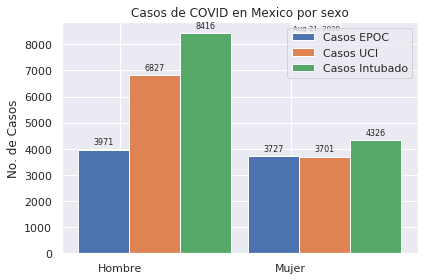

In [24]:
def grafica15():
    labels = ['Hombre', 'Mujer']
    covid_rate, hosp_rate, death_rate = [],[], []
    for i in range(len(labels)):
        covid_rate.append(len(df[(df.SEXO == i) & (df.EPOC == 1)]))
        hosp_rate.append(len(df[(df.SEXO == i) & (df.UCI == 1)]))
        death_rate.append(len(df[(df.SEXO == i) & (df.INTUBADO == 1)]))
    x = np.arange(len(labels)) #pocisiones de labels
    width = 0.30 #ancho de las barras
    fig, ax = plt.subplots()
    bar1 = ax.bar(x - width/3, covid_rate, width, label="Casos EPOC")
    bar2 = ax.bar(x + 2*(width/3), hosp_rate, width, label="Casos UCI")
    bar3 = ax.bar(x + 5*(width/3), death_rate, width, label="Casos Intubado")
    ax.set_ylabel("No. de Casos")
    ax.set_title("Casos de COVID en Mexico por sexo")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    def autolabel(rects):
    #Attach a text label above each bar in *rects*, displaying its height.
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=8)
    autolabel(bar1); autolabel(bar2); autolabel(bar3)
    #plt.show()
    plot_date(ax)
    fig.tight_layout()
grafica15()

,casos
2020-01-19,1.0
2020-01-26,0.0
2020-02-02,1.0
2020-02-09,1.0
2020-02-16,0.0
2020-02-23,5.0
2020-03-01,14.0
2020-03-08,80.0
2020-03-15,501.0
2020-03-22,934.0


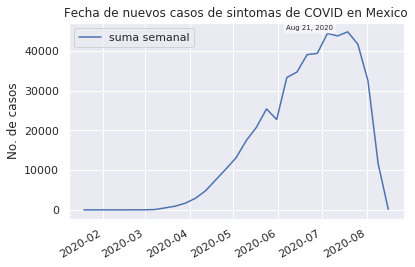

In [25]:
def casos_nuevos_indiv(df,titulo, columna_fecha, estado):
    if estado != False:
        df_aux = df.copy()
        df_aux.drop(df_aux[(df_aux['ENTIDAD_UM'] != estado)].index, inplace = True)
    elif estado == False:
        df_aux = df.copy()
    fechas = Counter(df_aux[columna_fecha])
    fechas = pd.DataFrame.from_dict(fechas, orient='index').reset_index() #convierte el dict a df
    fechas = fechas.rename(columns={'index':'Fecha', 0:'casos'}) #nombra las columnas
    fechas = fechas.sort_values(by='Fecha') #ordena la columna fecha
    fechas.drop(fechas[fechas.index == 0].index, inplace=True) #elimina fila con nan
    fechas['Fecha'] = pd.to_datetime(fechas['Fecha']) #columna fecha la convierte a datetime
    fechas = fechas.set_index('Fecha', append=False) #columna fecha la convierte a index
    fechas.index = fechas.index.date
    #nuevo df con las fechas completas
    fechas_total = pd.DataFrame(index=np.arange(np.datetime64(str(min(df['FECHA_INGRESO']))), np.datetime64(max(df['FECHA_INGRESO']))))
    fechas_total.index = fechas_total.index.date
    fechas_total = pd.merge(fechas_total,fechas, how='left',left_index=True,right_index=True)
    fechas_total = fechas_total.fillna(0)
    fechas_total.index= pd.to_datetime(fechas_total.index) 
    fechas_total=fechas_total.resample('W').sum()
    #plot
    fig, ax = plt.subplots()
    plot_date(ax)
    plt.plot(fechas_total.index,fechas_total['casos'], label="suma semanal")
    # plt.plot(fechas_total.index,y_poly, label="polinomial")
    plt.title(titulo)
    plt.gcf().autofmt_xdate()
    plt.ylabel("No. de casos")
    plt.legend()
    return fechas_total
casos_nuevos_indiv(df,titulo="Fecha de nuevos casos de sintomas de COVID en Mexico",columna_fecha='FECHA_SINTOMAS', estado=False)
#casos_nuevos_indiv(df,titulo="Fecha de nuevos casos de sintomas de COVID en CDMX",columna_fecha='FECHA_SINTOMAS', estado=9)



Se manda a llamar la funcion "casos_nuevos_indiv" con los 3 tipos de fechas para juntarlas en una sola gráfica

,síntomas,hospitalización,defunción
fecha,,,
2020-07-12,43754.0,41975.0,4154.0
2020-07-19,44781.0,45764.0,4135.0
2020-07-26,41670.0,44819.0,3984.0
2020-08-02,32443.0,39121.0,3580.0
2020-08-09,11637.0,30637.0,3048.0
2020-08-16,141.0,2361.0,388.0


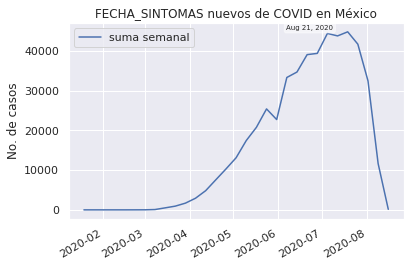

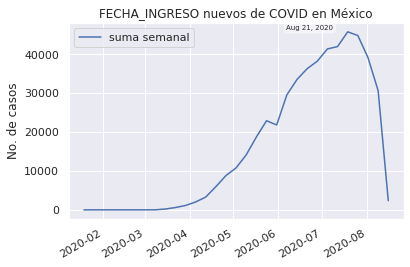

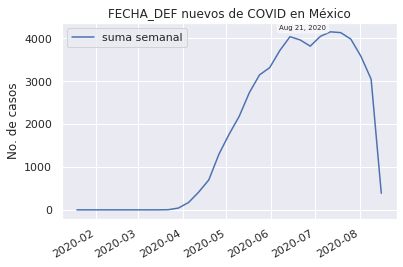

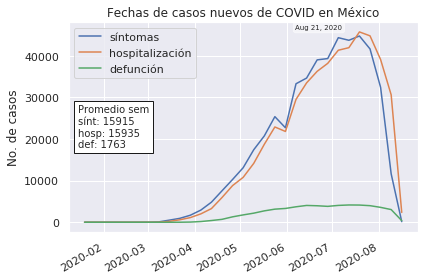

In [26]:
def casos_nuevos_total(df,estado, estado_str,show=None):
    columnas_fechas = ['FECHA_SINTOMAS', 'FECHA_INGRESO', 'FECHA_DEF']
    list_df = []
    for i, word in enumerate(columnas_fechas):
        list_df.append(casos_nuevos_indiv(df,titulo= str(word)+" nuevos de COVID en "+str(estado_str),columna_fecha=str(word), estado = estado))
    #genera nuevo dataframe con faechas como index
    df_fechas_mex = pd.DataFrame(index=np.arange(np.datetime64(min(df['FECHA_INGRESO'])), np.datetime64(max(df['FECHA_INGRESO']))))
    df_fechas_mex.index = df_fechas_mex.index.date
    df_fechas_mex.index = pd.to_datetime(df_fechas_mex.index) 
    df_fechas_mex=df_fechas_mex.resample('W').sum()
    #juntar las 3 columnas polinomios de fechas en df_fechas_mex
    total_fechas=[]
    for i in range(3):
        df_fechas_mex = pd.merge(df_fechas_mex,list_df[i].iloc[:,0], how='left',left_index=True,right_index=True)
        total_fechas.append(list_df[i].iloc[:,0].mean()) #guardar el total de las columnas fechas
    df_fechas_mex = df_fechas_mex.rename(columns={'casos_x':'síntomas', 'casos_y':'hospitalización','casos':'defunción'}) #nombra las columnas
    df_fechas_mex.index.name = 'fecha'
    #plot
    fig, ax = plt.subplots()
    texto="Promedio sem\nsínt: "+str(int(total_fechas[0]))+"\nhosp: "+str(int(total_fechas[1]))+"\ndef: "+str(int(total_fechas[2]))
    anchored_text = AnchoredText(texto, loc="center left")
    ax.add_artist(anchored_text)
    #################################
    plot_date(ax)
    ax.plot(df_fechas_mex.index,df_fechas_mex.iloc[:,0], label='síntomas')
    ax.plot(df_fechas_mex.index,df_fechas_mex.iloc[:,1], label='hospitalización')
    ax.plot(df_fechas_mex.index,df_fechas_mex.iloc[:,2], label='defunción')
    plt.title("Fechas de casos nuevos de COVID en "+str(estado_str))
    plt.gcf().autofmt_xdate()
    plt.ylabel("No. de casos")
    plt.legend()
    plt.tight_layout()
    return df_fechas_mex.tail(6)
casos_nuevos_total(df,estado=False, estado_str='México')
#casos_nuevos_total(df,estado=9, estado_str='CDMX')



,casos
2020-01-13,1.0
2020-01-14,1.0
2020-01-15,1.0
2020-01-16,1.0
2020-01-17,1.0
...,...
2020-08-07,492437.0
2020-08-08,492928.0
2020-08-09,493235.0
2020-08-10,493360.0


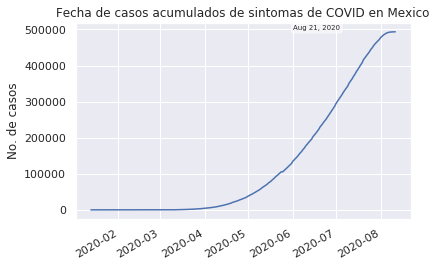

In [27]:
def casos_acum_indiv(df,titulo, columna_fecha, estado=None):
    if estado != None:
        df_aux = df.copy()
        df_aux.drop(df_aux[(df_aux['ENTIDAD_UM'] != estado)].index, inplace = True)
    elif estado == None:
        df_aux = df.copy()
    fechas = Counter(df_aux[columna_fecha]) #crea diccionario
    fechas = pd.DataFrame.from_dict(fechas, orient='index').reset_index() #convierte el dict a df
    fechas = fechas.rename(columns={'index':'Fecha', 0:'casos'}) #nombra las columnas
    fechas = fechas.sort_values(by='Fecha') #ordena la columna fecha
    fechas.drop(fechas[fechas.index == 0].index, inplace=True) #elimina fila con nan
    fechas['Fecha'] = pd.to_datetime(fechas['Fecha']) #columna fecha la convierte a datetime
    fechas = fechas.set_index('Fecha', append=False) #columna fecha la convierte a index
    fechas.index = fechas.index.date
    #nuevo df con las fechas completas
    fechas_total = pd.DataFrame(index=np.arange(np.datetime64(str(min(df['FECHA_INGRESO']))), np.datetime64(max(df['FECHA_INGRESO']))))
    fechas_total.index = fechas_total.index.date
    fechas_total = pd.merge(fechas_total,fechas, how='left',left_index=True,right_index=True)
    fechas_total = fechas_total.fillna(0)
    #crear cumsum para acumulados
    fechas_total = fechas_total.cumsum(skipna=False)
    #plot
    fig, ax = plt.subplots()
    plot_date(ax)
    plt.plot(fechas_total.index,fechas_total['casos'])
    plt.title(titulo)
    plt.gcf().autofmt_xdate()
    plt.ylabel("No. de casos")
    return fechas_total
casos_acum_indiv(df,titulo="Fecha de casos acumulados de sintomas de COVID en Mexico",columna_fecha='FECHA_SINTOMAS')
#casos_acum_indiv(df,titulo="Fecha de casos acumulados de sintomas de COVID en CDMX",columna_fecha='FECHA_SINTOMAS', estado=9)
   

Se manda a llamar la funcion "casos_acum_indiv" con las 3 columnas de fechas para guardarlas en una sola gráfica

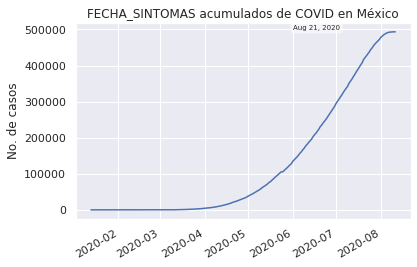

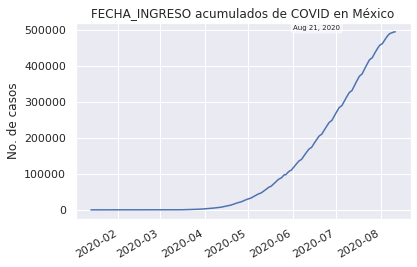

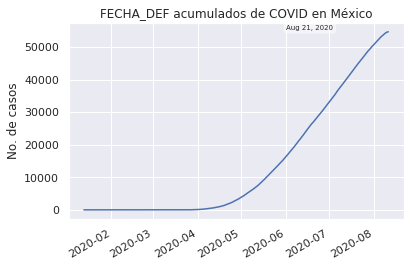

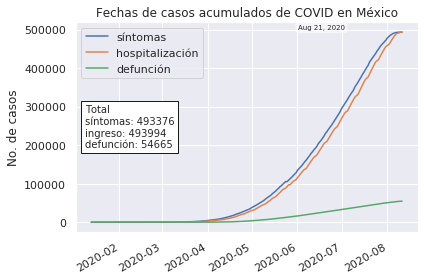

In [28]:
def casos_acum_total(df,estado, estado_str,show=None):
    columnas_fechas = ['FECHA_SINTOMAS', 'FECHA_INGRESO', 'FECHA_DEF']
    list_df = []
    for i, word in enumerate(columnas_fechas):
        list_df.append(casos_acum_indiv(df,titulo= str(word)+" acumulados de COVID en "+str(estado_str),columna_fecha=str(word), estado = estado))
    #genera nuevo dataframe con faechas como index
    df_fechas_mex = pd.DataFrame(index=np.arange(np.datetime64(min(df['FECHA_INGRESO'])), np.datetime64(max(df['FECHA_INGRESO']))))
    df_fechas_mex.index = df_fechas_mex.index.date
    #juntar las 3 columnas de fechas en df
    total_fechas=[]
    for i in range(3):
        df_fechas_mex = pd.merge(df_fechas_mex,list_df[i].iloc[:,0], how='left',left_index=True,right_index=True)
        total_fechas.append(list_df[i].iloc[-1:,0][0]) #guardar el ultimo valor de la columna
    #plot
    fig, ax = plt.subplots()
    texto="Total\nsíntomas: "+str(int(total_fechas[0]))+"\ningreso: "+str(int(total_fechas[1]))+"\ndefunción: "+str(int(total_fechas[2]))
    anchored_text = AnchoredText(texto, loc="center left")
    ax.add_artist(anchored_text)
    #################################
    plot_date(ax)
    ax.plot(df_fechas_mex.index,df_fechas_mex.iloc[:,0], label='síntomas')
    ax.plot(df_fechas_mex.index,df_fechas_mex.iloc[:,1], label='hospitalización')
    ax.plot(df_fechas_mex.index,df_fechas_mex.iloc[:,2], label='defunción')
    plt.title("Fechas de casos acumulados de COVID en "+str(estado_str))
    plt.gcf().autofmt_xdate()
    plt.ylabel("No. de casos")
    plt.legend()
    plt.tight_layout()
casos_acum_total(df,estado=None, estado_str='México')
#casos_acum_total(df,estado=9, estado_str='CDMX')

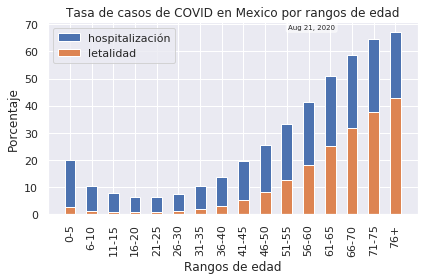

In [29]:
def grafica16(df):
    df['edad_rango'] = pd.cut(x=df['EDAD'], bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,max(df['EDAD'])], 
                              labels=['0-5','6-10','11-15','16-20','21-25','26-30','31-35','36-40','41-45','46-50','51-55','56-60','61-65','66-70','71-75','76+'])
    labels = df['edad_rango'].cat.categories.tolist()
    covid_rate, hosp_rate, death_rate = [],[],[]
    for i in range(len(labels)):
        covid_rate.append(len(df[df.edad_rango == df['edad_rango'].cat.categories.tolist()[i]]))
        hosp_rate.append(len(df[(df.edad_rango == df['edad_rango'].cat.categories.tolist()[i]) & (df.TIPO_PACIENTE == 1)]))
        death_rate.append(len(df[(df.edad_rango == df['edad_rango'].cat.categories.tolist()[i]) & (df.BOOL_DEF == 1)]))
    x = np.arange(len(labels)) #pocisiones de labels
    width = 0.5 #ancho de las barras
    fig, ax = plt.subplots()
    #se calcula el procentaje respecto a covid_rate
    hosp_percentage = [ hosp_rate[i]/covid_rate[i]*100 for i in range(len(covid_rate)) ]
    def_percentage = [ death_rate[i]/covid_rate[i]*100 for i in range(len(covid_rate)) ]
    #se grafican las barras
    ax.bar(x , hosp_percentage, width, label="hospitalización")
    ax.bar(x , def_percentage, width, label="letalidad")
    #grafica
    ax.set_ylabel("Porcentaje")
    ax.set_xlabel("Rangos de edad")
    ax.set_title("Tasa de casos de COVID en Mexico por rangos de edad")
    ax.set_xticks(x)
    plt.xticks(rotation='vertical')
    ax.set_xticklabels(labels)
    ax.legend()
    plot_date(ax)
    fig.tight_layout()
grafica16(df)

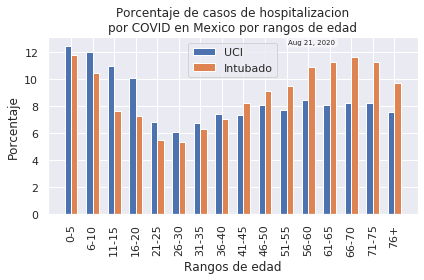

In [30]:
def grafica17():
    df['edad_rango'] = pd.cut(x=df['EDAD'], bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,max(df['EDAD'])], 
                              labels=['0-5','6-10','11-15','16-20','21-25','26-30','31-35','36-40','41-45','46-50','51-55','56-60','61-65','66-70','71-75','76+'])
    labels = df['edad_rango'].cat.categories.tolist()
    hosp_rate, uci_rate, vent_rate = [],[],[]
    for i in range(len(labels)):
        hosp_rate.append(len(df[(df.edad_rango == df['edad_rango'].cat.categories.tolist()[i]) & (df.TIPO_PACIENTE == 1)]))
        uci_rate.append(len(df[(df.edad_rango == df['edad_rango'].cat.categories.tolist()[i]) & (df.TIPO_PACIENTE == 1) & (df.UCI == 1)]))
        vent_rate.append(len(df[(df.edad_rango == df['edad_rango'].cat.categories.tolist()[i]) & (df.TIPO_PACIENTE == 1) & (df.INTUBADO == 1)]))
    x = np.arange(len(labels)) #posiciones de labels
    width = 0.3 #ancho de las barras
    fig, ax = plt.subplots()
    #se calcula el procentaje respecto a covid_rate
    uci_percentage = [ uci_rate[i]/hosp_rate[i]*100 for i in range(len(hosp_rate)) ]
    vent_percentage = [ vent_rate[i]/hosp_rate[i]*100 for i in range(len(hosp_rate)) ]
    #se grafican las barras
    ax.bar(x -width/2, uci_percentage, width, label="UCI")
    ax.bar(x +width/2, vent_percentage, width, label="Intubado")
    #grafica
    ax.set_ylabel("Porcentaje")
    ax.set_xlabel("Rangos de edad")
    ax.set_title("Porcentaje de casos de hospitalizacion\npor COVID en Mexico por rangos de edad")
    ax.set_xticks(x)
    plt.xticks(rotation='vertical')
    ax.set_xticklabels(labels)
    ax.legend()
    plot_date(ax)
    fig.tight_layout()
grafica17()

No handles with labels found to put in legend.


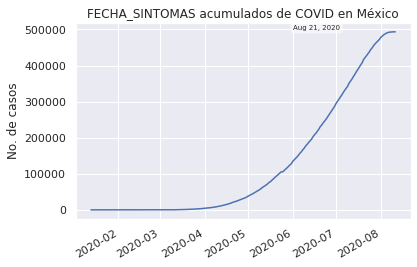

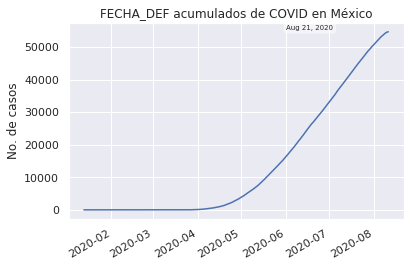

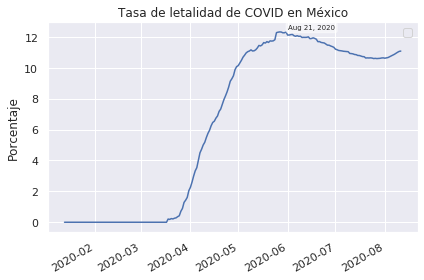

In [31]:
def mort_porcentaje(df,estado, estado_str):
    columnas_fechas = ['FECHA_SINTOMAS', 'FECHA_DEF']
    list_df = []
    for i, word in enumerate(columnas_fechas):
        list_df.append(casos_acum_indiv(df,titulo= str(word)+" acumulados de COVID en "+str(estado_str),columna_fecha=str(word), estado = estado))
    #genera nuevo dataframe con fechas como index
    df_fechas_mex = pd.DataFrame(index=np.arange(np.datetime64(min(df['FECHA_INGRESO'])), np.datetime64(max(df['FECHA_INGRESO']))))
    df_fechas_mex.index = df_fechas_mex.index.date
    #juntar las columnas de fechas en df
    for i in range(2):
        df_fechas_mex = pd.merge(df_fechas_mex,list_df[i].iloc[:,0], how='left',left_index=True,right_index=True)
    mort_porcentaje = [ df_fechas_mex.iloc[:,1][i]/df_fechas_mex.iloc[:,0][i]*100 for i in range(len(df_fechas_mex.iloc[:,0])) ]
    #plot
    fig, ax = plt.subplots()
    plot_date(ax)
    ax.plot(df_fechas_mex.index,mort_porcentaje)
    plt.title("Tasa de letalidad de COVID en "+str(estado_str))
    plt.gcf().autofmt_xdate()
    plt.ylabel("Porcentaje")
    plt.legend()
    plt.tight_layout()
mort_porcentaje(df,estado=None, estado_str='México')
#mort_porcentaje(df,estado=9, estado_str='CDMX')

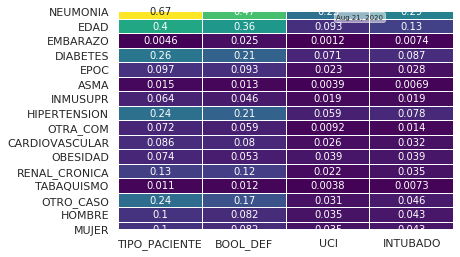

In [32]:
#MATRIZ CORRELACION
def mat_corr(df):
    #hacer columna de hombre y de mujer para reemplazar sexo
    data_matcorr = df.copy()
    data_matcorr['HOMBRE'] = ~data_matcorr['SEXO']
    data_matcorr['HOMBRE'] = data_matcorr['HOMBRE'].replace([-2], 0)
    data_matcorr['HOMBRE'] = data_matcorr['HOMBRE'].abs()
    data_matcorr['MUJER'] = data_matcorr['SEXO'][data_matcorr['SEXO'] == 1]
    data_matcorr['MUJER'] = data_matcorr['MUJER'].replace([np.NaN], 0)
    data_matcorr = data_matcorr.loc[:,['NEUMONIA','EDAD','EMBARAZO','DIABETES','EPOC','ASMA','INMUSUPR','HIPERTENSION','OTRA_COM','CARDIOVASCULAR','OBESIDAD','RENAL_CRONICA','TABAQUISMO','OTRO_CASO','HOMBRE','MUJER','TIPO_PACIENTE','BOOL_DEF','UCI','INTUBADO']]
    df1 = data_matcorr.corr()[['TIPO_PACIENTE']] 
    df2 = data_matcorr.corr()[['BOOL_DEF']] 
    df3 = data_matcorr.corr()[['UCI']] 
    df4 = data_matcorr.corr()[['INTUBADO']] 
    df_matcorr = df1.join(df2, how='outer')
    df_matcorr = df_matcorr.join(df3, how='outer')
    df_matcorr = df_matcorr.join(df4, how='outer')
    df_matcorr = df_matcorr.drop(index=(['TIPO_PACIENTE','BOOL_DEF','UCI','INTUBADO']))
    df_matcorr = df_matcorr.abs()
    fig, ax = plt.subplots()
    sns.heatmap(df_matcorr, 
                annot=True, 
                linewidths=0.1, 
                linecolor='white',
                cbar=False,
                cmap='viridis')
    plot_date(ax)
    #fig.tight_layout()
mat_corr(df)